In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col=0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


Intervalo de Confianza para la Esperanza de Vida
Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente.
Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

In [6]:
df["life_expectancy"].notnull().sum()

np.int64(187)

In [12]:
df_nonull = df[df["life_expectancy"].notnull()]

In [13]:
df_nonull

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
5,Antigua and Barbuda,223.0,AG,20.5,443.000,0.0,15.33,1.0,"St. John's, Saint John",557.000,113.81,1.2,XCD,1.99,22.3,0.99,1.727759e+09,105.0,24.8,5.0,"St. John's, Saint John",76.9,42.0,3.04,English,24.3,2.76,97.118,NaN,16.5,43.0,NaN,23.8,17.060816,-61.796428,Central America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912.050,343.0,17.88,58.0,Caracas,164.175,NaN,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,NaN,59.7,NaN,73.3,8.80,NaN,6.423750,-66.589730,South America
191,Vietnam,314.0,VN,39.3,331.210,522.0,16.75,84.0,Hanoi,192.668,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527.968,40.0,30.45,967.0,Sanaa,10.609,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,NaN,38.0,NaN,26.6,12.91,NaN,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752.618,16.0,36.19,260.0,Lusaka,5.141,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332,Africa


In [15]:
media = df_nonull["life_expectancy"].mean()
error = stats.sem(df_nonull["life_expectancy"])
nivel = 0.95 #nivel de confianza

#grado de libertad: tamaño de la muestra menos 1
grados_libertad = len(df_nonull["life_expectancy"]) - 1 

#(1+0.95)/2: calculo para ver que parte dejamos de las colas del histagrama, quiere decir 0.975 es la parte que coge de los datos.
valor_crit = stats.t.ppf((1+nivel)/2, df=grados_libertad)
#df: digrease of freedom: grados de libertad

In [16]:
print(valor_crit)

1.9728001139921347


In [17]:
limite_inferior = media - valor_crit * error
limite_superior = media + valor_crit * error

print(f"el intervalo de confianza al 95% es de {limite_inferior} <--> {limite_superior}")

el intervalo de confianza al 95% es de 71.20004561117909 <--> 73.35931267759096


Intervalo de Confianza para el PIB
Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

In [19]:
df["gdp"].isnull().sum()

np.int64(2)

In [20]:
df_gdp_nonull = df[df["gdp"].notnull()]

In [28]:
media_gdp = df_gdp_nonull["gdp"].mean()
error_gdp = stats.sem(df_gdp_nonull["gdp"])
nivel_gdp =0.90
g_l = len(df_gdp_nonull["gdp"]) - 1

valor_critico = stats.t.ppf((1+nivel_gdp)/2, df=g_l)

In [22]:
print(valor_critico)

1.6528285892693433


In [40]:
media_gdp = df_gdp_nonull["gdp"].mean()
media_gdp

np.float64(477295901399.5389)

In [29]:
lim_inf = media_gdp - valor_critico * error_gdp
lim_sup = media_gdp + valor_critico * error_gdp

print(f"el intervalo de confianza al 90% es de {lim_inf} <--> {lim_sup}")

el intervalo de confianza al 90% es de 218865474606.78442 <--> 735726328192.2933


<Axes: xlabel='gdp', ylabel='Count'>

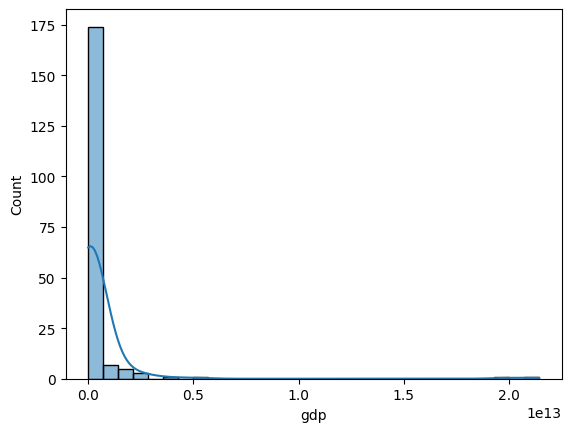

In [46]:
sns.histplot(x="gdp", data =df_gdp_nonull, bins= 30, kde=True)

<Axes: xlabel='gdp'>

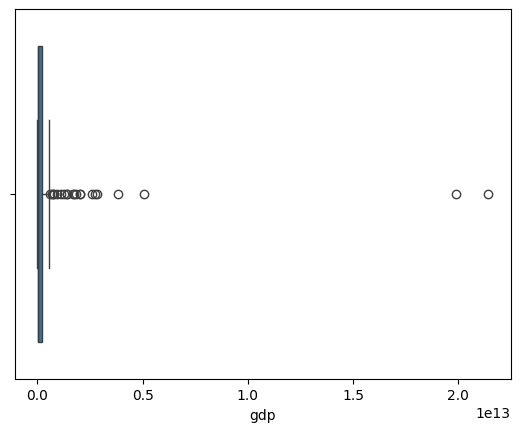

In [47]:
sns.boxplot(x="gdp", data=df_gdp_nonull)

Intervalo de Confianza para la Tasa de Natalidad
Contexto: Trabajas en una agencia gubernamental que se ocupa de cuestiones demográficas y deseas determinar el intervalo de confianza al 99% para la tasa de natalidad promedio en Asia.


In [30]:
df_asia = df[df["continent"] == "Asia"]
df_asia.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.000,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
7,Armenia,104.000,AM,58.9,29.743,49.0,13.99,374.0,Yerevan,5.156,129.18,1.4,AMD,1.76,11.7,0.77,1.367280e+10,92.7,54.6,11.0,Yerevan,74.9,26.0,0.66,Armenian,81.6,4.40,NaN,55.6,20.9,22.6,16.99,NaN,40.069099,45.038189,Asia
10,Azerbaijan,123.000,AZ,57.7,86.600,82.0,14.00,994.0,Baku,37.620,156.32,2.6,AZN,1.73,14.1,0.56,3.920700e+10,99.7,27.7,19.2,Baku,72.9,26.0,0.47,Azerbaijani language,78.6,3.45,NaN,66.5,13.0,40.7,5.51,NaN,40.143105,47.576927,Asia
12,Bahrain,2.239,BH,11.1,765.000,19.0,13.99,973.0,Manama,31.694,117.59,2.1,BHD,1.99,0.8,0.43,3.857407e+10,99.4,50.5,6.1,Riffa,77.2,14.0,NaN,Arabic,25.1,0.93,NaN,73.4,4.2,13.8,0.71,NaN,26.066700,50.557700,Asia
13,Bangladesh,1.265,BD,70.6,148.460,221.0,18.18,880.0,Dhaka,84.246,179.68,5.6,BDT,2.04,11.0,1.12,3.025713e+11,116.5,20.6,25.1,Dhaka,72.3,173.0,0.51,Bengali,71.8,0.58,NaN,59.0,8.8,33.4,4.19,NaN,23.684994,90.356331,Asia


In [33]:
df_asia["birth_rate"].isnull().sum()

np.int64(1)

In [34]:
df_asia = df_asia[df_asia["birth_rate"].notnull()]

In [36]:
media = df_asia["birth_rate"].mean()
error = stats.sem(df_asia["birth_rate"])
nivel = 0.99 #nivel de confianza

#grado de libertad: tamaño de la muestra menos 1
grados_libertad = len(df_asia["birth_rate"]) - 1 

#(1+0.95)/2: calculo para ver que parte dejamos de las colas del histagrama, quiere decir 0.975 es la parte que coge de los datos.
valor_crit = stats.t.ppf((1+nivel)/2, df=grados_libertad)
#df: digrease of freedom: grados de libertad

In [38]:
lim_inf = media - valor_crit * error
lim_sup = media + valor_crit * error

print(f"el intervalo de confianza al 99% es de {lim_inf} <--> {lim_sup}")

el intervalo de confianza al 99% es de 16.140273966853712 <--> 21.481998760419017


Intervalo de Confianza para la Tasa de Desempleo
Contexto: Eres un analista de políticas públicas y deseas calcular el intervalo de confianza al 95% para la tasa de desempleo promedio en los países de Oceanía.

In [48]:
df["unemployment_rate"].isnull().sum()

np.int64(19)

In [60]:
df_oceania = df[df["continent"] == "Oceania"]
df_oceania = df_oceania.notnull()

In [68]:
df_oceania = df[df["continent"] == "Oceania"]
df_oceania.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
8,Australia,3.0,AU,48.2,NaN,58.0,12.60,61.0,Canberra,375.908,119.80,1.6,AUD,1.74,16.3,0.93,1.392681e+12,100.3,113.1,3.1,Sydney,82.7,6.0,13.59,NaN,19.6,3.68,NaN,65.5,23.0,47.4,5.27,NaN,-25.274398,133.775136,Oceania
58,Fiji,49.0,FJ,23.3,18.274,4.0,21.28,679.0,Suva,2.046,132.30,1.8,FJD,2.77,55.9,0.82,5.535549e+09,106.4,16.1,21.6,Suva,67.3,34.0,1.28,Fiji Hindi,21.4,0.84,889.953,57.6,24.2,32.1,4.10,505.048,-17.713371,178.065032,Oceania
89,Kiribati,147.0,KI,42.0,811.000,NaN,27.89,686.0,South Tarawa,66.000,99.55,0.6,AUD,3.57,15.0,NaN,1.946472e+08,101.3,NaN,41.2,South Tarawa,68.1,92.0,NaN,English,0.2,0.20,117.606,NaN,22.0,32.7,NaN,64.489,1.836898,-157.376832,Oceania
107,Marshall Islands,329.0,MH,63.9,181.000,NaN,29.03,692.0,Majuro,143.000,NaN,NaN,USD,4.05,70.2,1.44,2.212780e+08,84.7,23.7,27.4,Majuro,65.2,NaN,2.00,Marshallese,10.0,0.42,58.791,NaN,17.8,65.9,NaN,45.514,7.131474,171.184478,Oceania
111,Federated States of Micronesia,784.0,FM,31.4,702.000,NaN,22.82,691.0,Palikir,143.000,112.10,0.5,USD,3.05,91.9,NaN,4.019323e+08,97.2,14.1,25.6,Palikir,67.8,88.0,NaN,English,2.5,0.18,113.815,NaN,25.2,60.5,NaN,25.963,7.425554,150.550812,Oceania


In [69]:
df_oceania = df_oceania[df_oceania["unemployment_rate"].notnull()]

<Axes: xlabel='unemployment_rate', ylabel='Count'>

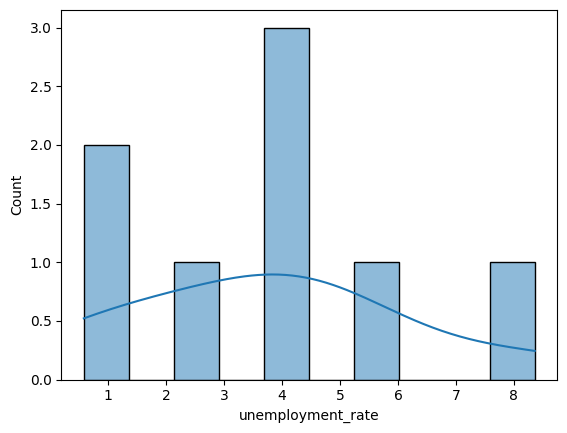

In [72]:
sns.histplot(x="unemployment_rate", data= df_oceania, bins=10, kde=True)

In [73]:
media = df_oceania["unemployment_rate"].mean()
error = stats.sem(df_oceania["unemployment_rate"])
nivel = 0.95 #nivel de confianza

#grado de libertad: tamaño de la muestra menos 1
grados_libertad = len(df_oceania["unemployment_rate"]) - 1 

#(1+0.95)/2: calculo para ver que parte dejamos de las colas del histagrama, quiere decir 0.975 es la parte que coge de los datos.
valor_crit = stats.t.ppf((1+nivel)/2, df=grados_libertad)
#df: digrease of freedom: grados de libertad

In [74]:
lim_inf = media - valor_crit * error
lim_sup = media + valor_crit * error

print(f"el intervalo de confianza al 95% es de {lim_inf} <--> {lim_sup}")

el intervalo de confianza al 95% es de 1.7262344147494337 <--> 5.861265585250566
